In [2]:
from tools.helpers import read_json, pandas_keep_columns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

In [10]:
df = pd.read_csv(
    'data/processing/data_filtered.csv',
    low_memory=False,
)

df = df.drop(
    [
        'issue_date',  # parsed out to month and year
        'z_score_annual_inc',  # removing these, for filtering part 1
        'z_score_revol_bal',  # removing these, for filtering part 1
        'z_score_dti',  # removing these, for filtering part 1
        'year_grade',  # year and grade are also own columns
        'loan_status',  # this is dummy in 'default' col
        'max_date',  # removing, for filtering in part 2
        'issue_d',
    ],
    axis=1,
)

one_hot = pd.get_dummies(df)

# print(one_hot.head(15))

x = one_hot.drop('default', axis=1)
y = df[['default']]

# x.to_csv('data/processing/data_filtered_train.csv')

model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(x, y.values.ravel())
predicted_classes = model.predict(x)
#accuracy = accuracy_score(y.flatten(), predicted_classes)
accuracy = accuracy_score(y.values.ravel(), predicted_classes)
parameters = model.coef_
print(accuracy)
print(parameters)

0.9237720664859534
[[ 6.50741583e-05  1.07546789e-03  1.08384642e-01 -3.53693596e-06
   1.15329040e-02  8.63305280e-06 -1.07721646e-03 -9.43057539e-04
  -1.74222707e-02 -8.68195412e-03 -3.29726260e-03 -9.60413770e-03
   9.60252283e-03 -7.78170143e-03 -3.60795278e-03  2.56387264e-03
   4.06841245e-03  3.32752680e-03  1.14804835e-03  2.80179113e-04]]


In [11]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x, y)))


Accuracy of logistic regression classifier on test set: 0.92


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, predicted_classes)
print(confusion_matrix)


[[ 990831   32936]
 [ 135819 1054235]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y, predicted_classes))


              precision    recall  f1-score   support

           0       0.88      0.97      0.92   1023767
           1       0.97      0.89      0.93   1190054

    accuracy                           0.92   2213821
   macro avg       0.92      0.93      0.92   2213821
weighted avg       0.93      0.92      0.92   2213821



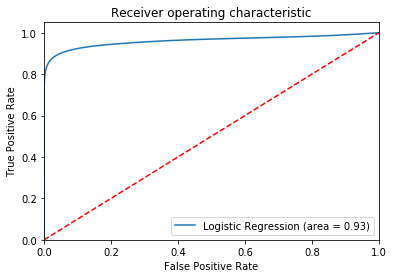

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y, model.predict(x))
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

